<a href="https://colab.research.google.com/github/vappanna/BerAIML/blob/main/prompt_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

**The objective of this exercise is to help predict the price of used cars after analyzing the key attributes that determine the price. This includes understanding the data, cleaning up the data, determining the importatnt features and then evaluating different models.**


In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.



1.   Explore the data - Understand the data type of each column, list the number of features,(18), What are the valid values and bad data in each column, are there any columns that do not add any value.
2.   Outliers - Try to find the outliers in the columns - negative price, blank year or tyear in the 1800's..
3.



In [99]:
df = pd.read_csv("/content/sample_data/vehicles.csv")

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [101]:
df.describe(include="all")

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
count,4.268800e+05,426880,4.268800e+05,425675.000000,409234,421603,252776,249202,423867,4.224800e+05,418638,424324,265838,296313,120519,334022,296677,426880
unique,NaN,404,NaN,NaN,42,29649,6,8,5,NaN,6,3,118246,3,4,13,12,51
top,NaN,columbus,NaN,NaN,ford,f-150,good,6 cylinders,gas,NaN,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ca
freq,NaN,3608,NaN,NaN,70985,8009,121456,94169,356209,NaN,405117,336524,261,131904,63465,87056,79285,50614
mean,7.311487e+09,NaN,7.519903e+04,2011.235191,NaN,NaN,NaN,NaN,NaN,9.804333e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.473170e+06,NaN,1.218228e+07,9.452120,NaN,NaN,NaN,NaN,NaN,2.138815e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.207408e+09,NaN,0.000000e+00,1900.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.308143e+09,NaN,5.900000e+03,2008.000000,NaN,NaN,NaN,NaN,NaN,3.770400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.312621e+09,NaN,1.395000e+04,2013.000000,NaN,NaN,NaN,NaN,NaN,8.554800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.315254e+09,NaN,2.648575e+04,2017.000000,NaN,NaN,NaN,NaN,NaN,1.335425e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:

df['price'].describe()

,price
count,4.268800e+05
mean,7.519903e+04
std,1.218228e+07
min,0.000000e+00
25%,5.900000e+03
50%,1.395000e+04
75%,2.648575e+04
max,3.736929e+09


In [103]:
df['year'].unique()

array([  nan, 2014., 2010., 2020., 2017., 2013., 2012., 2016., 2019.,
       2011., 1992., 2018., 2004., 2015., 2001., 2006., 1968., 2003.,
       2008., 2007., 2005., 1966., 2009., 1998., 2002., 1999., 2021.,
       1997., 1976., 1969., 1995., 1978., 1954., 1979., 1970., 1974.,
       1996., 1987., 2000., 1955., 1960., 1991., 1972., 1988., 1994.,
       1929., 1984., 1986., 1989., 1973., 1946., 1933., 1958., 1937.,
       1985., 1957., 1953., 1942., 1963., 1977., 1993., 1903., 1990.,
       1965., 1982., 1948., 1983., 1936., 1932., 1951., 1931., 1980.,
       1967., 1971., 1947., 1981., 1926., 1962., 1975., 1964., 1934.,
       1952., 1940., 1959., 1950., 1930., 1956., 1922., 1928., 2022.,
       1901., 1941., 1924., 1927., 1939., 1923., 1949., 1961., 1935.,
       1918., 1900., 1938., 1913., 1916., 1943., 1925., 1921., 1915.,
       1945., 1902., 1905., 1920., 1944., 1910., 1909.])

In [104]:
df['model'].unique()

array([nan, 'sierra 1500 crew cab slt', 'silverado 1500', ...,
       'gand wagoneer', '96 Suburban', 'Paige Glenbrook Touring'],
      dtype=object)

In [105]:
df['manufacturer'].unique()

array([nan, 'gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini',
       'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'datsun', 'aston-martin', 'land rover', 'morgan'], dtype=object)

In [106]:
df['year'].unique()

array([  nan, 2014., 2010., 2020., 2017., 2013., 2012., 2016., 2019.,
       2011., 1992., 2018., 2004., 2015., 2001., 2006., 1968., 2003.,
       2008., 2007., 2005., 1966., 2009., 1998., 2002., 1999., 2021.,
       1997., 1976., 1969., 1995., 1978., 1954., 1979., 1970., 1974.,
       1996., 1987., 2000., 1955., 1960., 1991., 1972., 1988., 1994.,
       1929., 1984., 1986., 1989., 1973., 1946., 1933., 1958., 1937.,
       1985., 1957., 1953., 1942., 1963., 1977., 1993., 1903., 1990.,
       1965., 1982., 1948., 1983., 1936., 1932., 1951., 1931., 1980.,
       1967., 1971., 1947., 1981., 1926., 1962., 1975., 1964., 1934.,
       1952., 1940., 1959., 1950., 1930., 1956., 1922., 1928., 2022.,
       1901., 1941., 1924., 1927., 1939., 1923., 1949., 1961., 1935.,
       1918., 1900., 1938., 1913., 1916., 1943., 1925., 1921., 1915.,
       1945., 1902., 1905., 1920., 1944., 1910., 1909.])

In [107]:
df['odometer'].describe()

,odometer
count,4.224800e+05
mean,9.804333e+04
std,2.138815e+05
min,0.000000e+00
25%,3.770400e+04
50%,8.554800e+04
75%,1.335425e+05
max,1.000000e+07


In [108]:
df['price'].describe()

,price
count,4.268800e+05
mean,7.519903e+04
std,1.218228e+07
min,0.000000e+00
25%,5.900000e+03
50%,1.395000e+04
75%,2.648575e+04
max,3.736929e+09


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [109]:
CURRENT_YEAR = 2025
## Nobody cares about VIN number. Drop it for analyis
df = df.drop(columns=['VIN', 'id'], errors='ignore')
## Any car older than 25 years can be considered vintage
df['year'] = df['year'].fillna(df['year'].median())
df = df[(df['year'] >= 2000) & (df['year'] <= 2025)]
df['year'].unique()
##Drop records where oddometer is 0. These are new cars. Also drop records where the mileage is greater than 300k. Heard once that Honda bought a Civic back when it had 400K to add it to their museum.
df['odometer'] = df['odometer'].fillna(df['odometer'].median())
df = df[df['odometer'] <= 300_000]
df = df[df['odometer'] > 0]
df = df[(df['price'] >= 1000) & (df['price'] <= 100000)]

df['age'] = CURRENT_YEAR - df['year']
df['age'] = df['age'].clip(lower=0)  # just in case

# Avoid divide-by-zero
df['mileage_per_year'] = df['odometer'] / df['age'].replace(0, 1)

# Use log(price) for more linear behavior
df['log_price'] = np.log(df['price'])

In [110]:
# Features
fet_cols = [
    'region', 'manufacturer', 'model', 'condition', 'cylinders',
    'fuel', 'title_status', 'transmission', 'drive', 'size',
    'type', 'paint_color', 'state'
]

for fet in fet_cols:
    if fet in df.columns:
        df[fet] = df[fet].fillna("unknown")

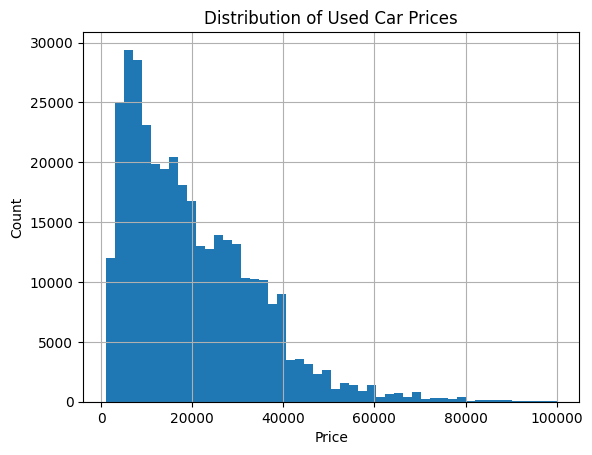

In [111]:
plt.figure()
df['price'].hist(bins=50)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Distribution of Used Car Prices")
plt.show()

<Figure size 640x480 with 0 Axes>

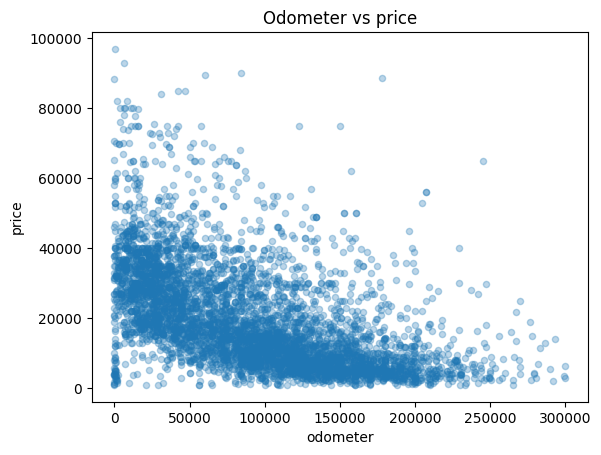

In [112]:
plt.figure()
df.sample(5000, random_state=42).plot(
    kind='scatter',
    x='odometer',
    y='price',
    alpha=0.3
)
plt.title("Odometer vs price")
plt.show()

<Figure size 640x480 with 0 Axes>

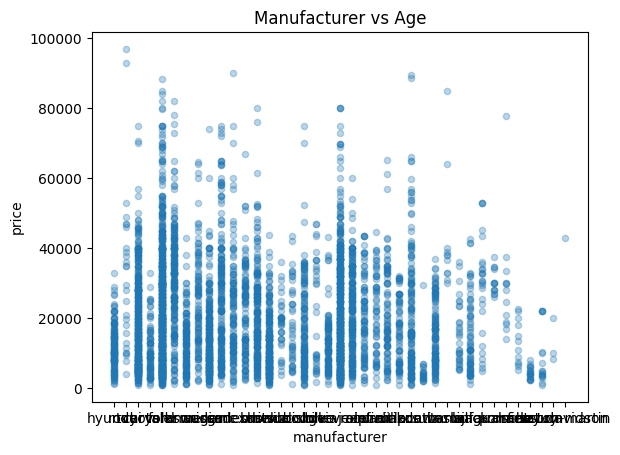

In [113]:
plt.figure()
df.sample(5000, random_state=42).plot(
    kind='scatter',
    x='manufacturer',
    y='price',
    alpha=0.3
)
plt.title("Manufacturer vs Age")
plt.show()

<Figure size 640x480 with 0 Axes>

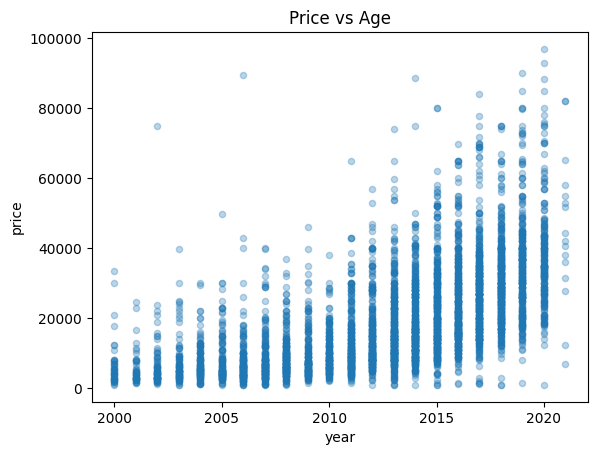

In [117]:
plt.figure()
df.sample(5000, random_state=42).plot(
    kind='scatter',
    x='year',
    y='price',
    alpha=0.3
)
plt.title("Price vs Age")
plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [118]:
target = 'log_price'

features = [
    'age', 'odometer', 'mileage_per_year',
    'region', 'manufacturer', 'model', 'condition',
    'cylinders', 'fuel', 'title_status', 'transmission',
    'drive', 'size', 'type', 'paint_color', 'state'
]

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [119]:
num_cols = ['age', 'odometer', 'mileage_per_year']
cat_cols = list(set(features) - set(num_cols))

preprocess = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

In [120]:
lin_model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', LinearRegression())
])

lin_scores = cross_val_score(
    lin_model, X_train, y_train, cv=5,
    scoring='r2', n_jobs=-1)

print("Linear Regression: Mean CV R² =", np.mean(lin_scores))
print("Linear Regression: Std CV R² =", np.std(lin_scores))

Linear Regression: Mean CV R² = 0.7364402644678856
Linear Regression: Std CV R² = 0.002663370852923987


In [90]:
ridge_model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', Ridge(alpha=1.0))
])

In [121]:
ridge_pipe = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', Ridge())
])

# ------------ Hyperparameter grid (alpha) ------------
param_grid = {
    'model__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

grid = GridSearchCV(
    ridge_pipe,
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best alpha:", grid.best_params_['model__alpha'])
print("Best CV R²:", grid.best_score_)

Best alpha: 100.0
Best CV R²: 0.47230667410027793


In [122]:
models = {
    "LinearRegression": lin_model,
    "Ridge": ridge_model
}

results = {}

for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train,
                                cv=5, scoring='r2', n_jobs=-1)
    results[name] = (np.mean(cv_scores), np.std(cv_scores))

results

{'LinearRegression': (np.float64(0.7364402644678856),
  np.float64(0.002663370852923987)),
 'Ridge': (np.float64(0.4723066741002772), np.float64(0.005171371480056636))}

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [123]:
best_model = ridge_model
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
rmse_log = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_price = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred)))

print("Test R²:", r2)
print("RMSE in log terms:", rmse_log)
print("RMSE in dollars:", rmse_price)

Test R²: 0.4739994140199194
RMSE in log terms: 0.597730160787811
RMSE in dollars: 14011.041393472135


In [124]:
best_ridge = grid.best_estimator_

# Get the fitted preprocessing and model
preprocess_fitted = best_ridge.named_steps['preprocess']
ridge_fitted = best_ridge.named_steps['model']

# ------------- Get feature names -------------
# numeric names (unchanged)
num_feature_names = num_cols

# categorical names from the fitted OneHotEncoder
ohe = preprocess_fitted.named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(cat_cols)

# full list of feature names in the same order as coefficients
feature_names = np.concatenate([num_feature_names, ohe_feature_names])

# ------------- Coefficients -------------
coefs = ridge_fitted.coef_

coef_df = pd.DataFrame({
    'feature': feature_names,
    'coef': coefs,
    'abs_coef': np.abs(coefs)
}).sort_values('abs_coef', ascending=False)

# Top 20 most important features
coef_df.head(20)

,feature,coef,abs_coef
2,mileage_per_year,1.164975e-04,1.164975e-04
1,odometer,-1.427178e-05,1.427178e-05
0,age,-2.227928e-07,2.227928e-07
20277,drive_4wd,1.891420e-08,1.891420e-08
20278,drive_fwd,-1.838846e-08,1.838846e-08
20265,cylinders_4 cylinders,-1.413037e-08,1.413037e-08
20273,fuel_gas,-1.384901e-08,1.384901e-08
20245,type_sedan,-1.259773e-08,1.259773e-08
20268,cylinders_8 cylinders,1.235738e-08,1.235738e-08
20271,fuel_diesel,1.114671e-08,1.114671e-08


In [125]:
print(coef_df.head(20))

                     feature          coef      abs_coef
2           mileage_per_year  1.164975e-04  1.164975e-04
1                   odometer -1.427178e-05  1.427178e-05
0                        age -2.227928e-07  2.227928e-07
20277              drive_4wd  1.891420e-08  1.891420e-08
20278              drive_fwd -1.838846e-08  1.838846e-08
20265  cylinders_4 cylinders -1.413037e-08  1.413037e-08
20273               fuel_gas -1.384901e-08  1.384901e-08
20245             type_sedan -1.259773e-08  1.259773e-08
20268  cylinders_8 cylinders  1.235738e-08  1.235738e-08
20271            fuel_diesel  1.114671e-08  1.114671e-08
20244            type_pickup  1.009330e-08  1.009330e-08
20246             type_truck  8.632497e-09  8.632497e-09
20707      paint_color_white  6.873172e-09  6.873172e-09
20256      condition_unknown  6.547962e-09  6.547962e-09
20261           size_unknown  6.229617e-09  6.229617e-09
66         manufacturer_ford  5.752137e-09  5.752137e-09
87          manufacturer_ram  5

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

**The coefficient table above shows that the top 3 drivers for the price are Mileage per year, odomemeter and age of the cars. The other coefficients while extremly small might need more analysis and also grouping of some of the feature and exploring other models ?**